<h3>To do: explain the methods<br></h3

<h3>Discover the best math grades of ENEM 2016<br></h3>

You must create a model to predict the math test grade for those who participated in ENEM 2016. For this you will use Python, Pandas, Sklearn and Regression.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from src.visualization.visualize import plot_dist

# expand the amount of displayed columns in pandas
pd.set_option('display.max_columns', 500)

%matplotlib inline

In [2]:
# MAPE: Mean absolute percentage error
mape = lambda y_true, y_pred: (abs(y_true-y_pred)/y_true).mean()

train = pd.read_csv('../../data/interim/train2.csv').set_index('NU_INSCRICAO')

train_X = train.iloc[:,:-1]
train_Y = train.iloc[:,-1]

**Simple linear regression**

MAPE: 0.1242


/home/artur/.virtualenvs/jornada-code-nation-enem/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


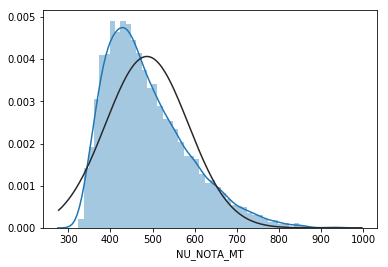

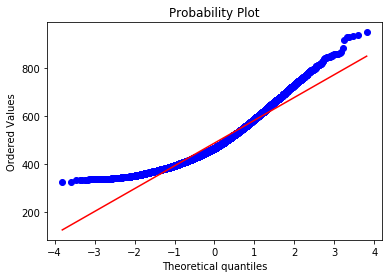

In [3]:
model_lin = LinearRegression(normalize=True)
model_lin = model_lin.fit(X=train_X, y=train_Y)
print('MAPE: %.4f'%mape(y_true=train_Y, y_pred=model_lin.predict(train_X)))
plot_dist(train.NU_NOTA_MT)

We can increase its performance by analizing and transforming the behaviour of the input data

<h3>Normalization and linearization attempt</h3>

<a href="https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python">_Comprehensive data exploration with python_</a>


MAPE: 0.1212


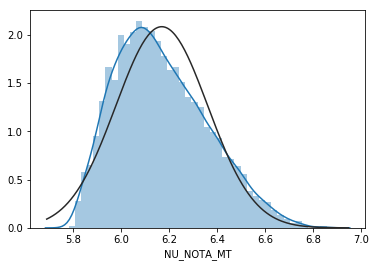

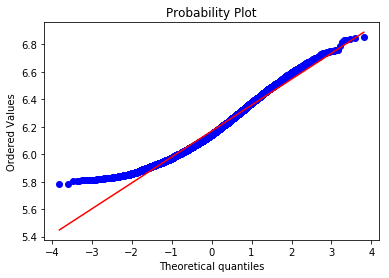

In [4]:
Y_log = np.log(train_Y)
plot_dist(Y_log)
model_log = LinearRegression(normalize=True).fit(X=train_X, y=Y_log)
print('MAPE: %.4f'%mape(y_true=train_Y, y_pred=np.exp(model_log.predict(train_X))))

<h3><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html">BOX-COX Method</a></h3>

<a href="https://www.nuffield.ox.ac.uk/users/cox/cox72.pdf"><br>_G.E.P. Box and D.R. Cox, “An Analysis of Transformations”_</a><br>


MAPE: 0.1193


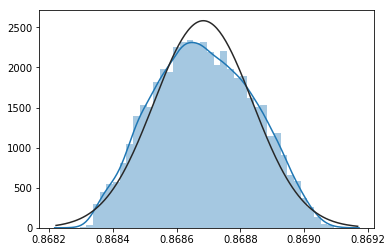

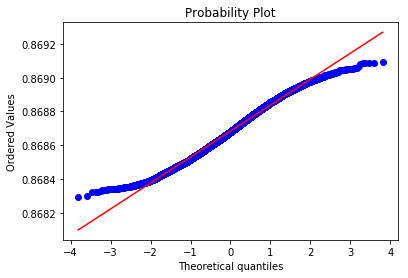

In [5]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

bc_Y, maxlog = boxcox(train['NU_NOTA_MT'].values)

model_bc = LinearRegression(normalize=True).fit(X=train_X, y=bc_Y)
Y_pred_bc = inv_boxcox(model_bc.predict(train_X), maxlog)

print('MAPE: %.4f'%mape(y_true=train_Y, y_pred=Y_pred_bc))
plot_dist(bc_Y)

<h3><a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html">QuantileTransformer</a></h3>
<br><a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">Rank transformer</a><br>


MAPE: 0.1193


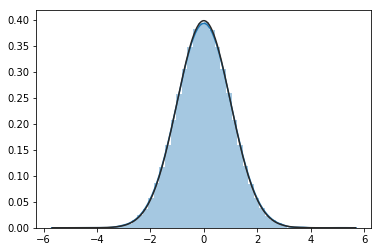

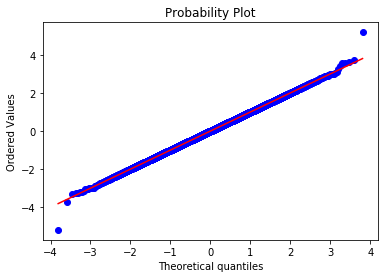

In [6]:
from src.models.regression import TransformedLinearRegression

model_qt = TransformedLinearRegression(n_quantiles=1500)
model_qt.fit(train_X, train_Y)
Y_qt = model_qt.predict(train_X)
print('MAPE: %.4f'%mape(y_true=train_Y, y_pred=Y_qt))
model_qt.plot_dist(train_Y)

In [8]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="hide/show_code"></form>''')